In [14]:
import pandas as pd
from pycaret.classification import *
import numpy as np


In [15]:
df = pd.read_csv("/Users/henricobela/Desktop/Estudos/Github/portfolio/data/data.csv")

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
s = setup(df, target = 'Response', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(2240, 29)"
4,Transformed data shape,"(2240, 40)"
5,Transformed train set shape,"(1568, 40)"
6,Transformed test set shape,"(672, 40)"
7,Numeric features,25
8,Categorical features,3
9,Rows with missing values,1.1%


In [19]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:21:48
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [20]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [21]:
# evaluate_model(best_model)

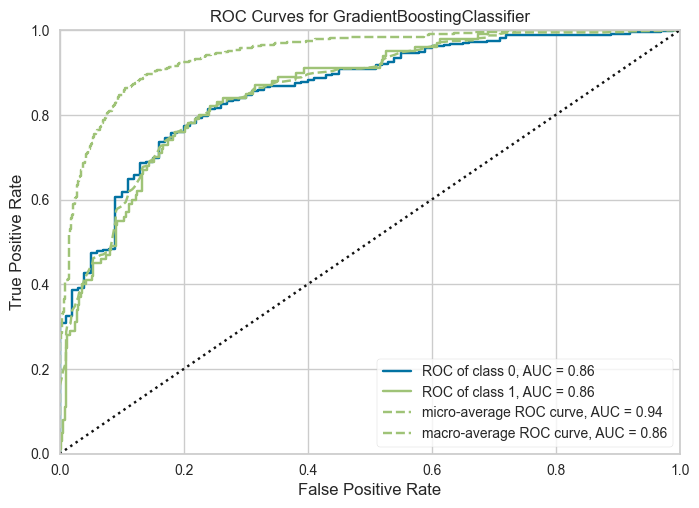

In [22]:
plot_model(best_model, plot = 'auc')

In [23]:
predictions = predict_model(best_model, data = df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9299,0.9496,0.5928,0.9041,0.7161,0.6781,0.6978


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,prediction_label,prediction_score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,0.9007
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,0,0.9813
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,0.9624
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,0,0.9736
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,0,0.9532


In [24]:
tuned_model = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:21:57
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9108,0.8589,0.5652,0.7647,0.6500,0.6002,0.6092
1,0.8726,0.9017,0.3913,0.6000,0.4737,0.4049,0.4168
2,0.8662,0.8105,0.3478,0.5714,0.4324,0.3617,0.3760
3,0.8790,0.8574,0.3913,0.6429,0.4865,0.4225,0.4392
4,0.8917,0.8606,0.3750,0.8182,0.5143,0.4627,0.5075
5,0.8599,0.8665,0.2500,0.6000,0.3529,0.2890,0.3241
6,0.8790,0.8916,0.4167,0.6667,0.5128,0.4479,0.4640
7,0.8917,0.8850,0.5000,0.7059,0.5854,0.5252,0.5355
8,0.8974,0.9353,0.4783,0.7333,0.5789,0.5235,0.5390


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
save_model(tuned_model, "model_pickle")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ID', 'Year_Birth', 'Income',
                                              'Kidhome', 'Teenhome', 'Recency',
                                              'MntWines', 'MntFruits',
                                              'MntMeatProducts',
                                              'MntFishProducts',
                                              'MntSweetProducts', 'MntGoldProds',
                                              'NumDealsPurchases',
                                              'NumWebPurchases'...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=3, max_features=None,
  